In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("PlasticSales.csv")
data.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [3]:
data.shape

(60, 2)

In [4]:
#names of dummy variables
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [5]:
p = data["Month"][0]
p[0:3]

'Jan'

In [6]:
data['months']= 0

In [7]:
for i in range(60):
    p = data["Month"][i]
    data['months'][i]= p[0:3]

<ipython-input-7-58db8ac8224c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['months'][i]= p[0:3]
C:\Users\AshishD7715\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data.head(2)

,Month,Sales,months
0,Jan-49,742,Jan
1,Feb-49,697,Feb


In [9]:
month_dummies = pd.DataFrame(pd.get_dummies(data['months']))

In [10]:
Plastic = pd.concat([data,month_dummies],axis = 1)

In [11]:
Plastic["t"] = np.arange(1,61)

In [12]:
Plastic["t_squared"] = Plastic["t"]*Plastic["t"]

In [13]:
Plastic["log_Sales"] = np.log(Plastic["Sales"])

In [14]:
Plastic.columns

Index(['Month', 'Sales', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Sales'],
      dtype='object')

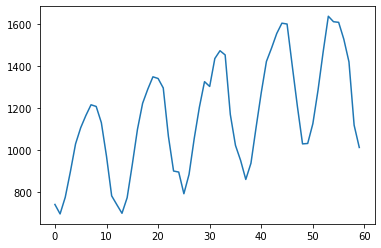

In [15]:
Plastic.Sales.plot()

In [16]:
Train = Plastic.head(52)

In [17]:
Test = Plastic.tail(8)

In [18]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

242.02246648157023

In [19]:
##################### Exponential ##############################

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

244.91816989628387

In [20]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

259.06462933578325

In [21]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea


221.520826475752

In [22]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

224.92098950591728

In [23]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

225.86960715518296

In [24]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

204.61041648177246

In [25]:
#Creating dataframe of all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,242.022466
1,rmse_Exp,244.918170
2,rmse_Quad,259.064629
3,rmse_add_sea,221.520826
4,rmse_add_sea_quad,224.920990
5,rmse_Mult_sea,225.869607
6,rmse_Mult_add_sea,204.610416


In [ ]:
# so rmse_Mult_add_sea has the least value among the models prepared so far, so we use this model for forecasting